<a href="https://colab.research.google.com/github/JinnieL/DA_with_Bigquery_and_Pandas/blob/main/3.%20BigQuery%20%EC%82%AC%EC%9A%A9%EB%B2%95%20%EB%B0%8F%20Python%20%EC%97%B0%EB%8F%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bigquery란?
구글 클라우드의 데이터 분석 플랫폼.     
데이터를 관리하고 분석가능한 데이터 웨어하우스    


## Bigquery의 주요 특징과 기능
1. 서버리스 아키텍처 : 서버리스, 자동 확장
      - 사용자가 직접 서버를 관리하지 않고도 데이터 저장과 처리 리소스를 자동으로 관리.
      - 인프라 관리 없이도 대규모 데이터 분석 가능.
      - 자동 확장 : 데이터 양이나 쿼리의 복잡도에 따라 리소스를 조정하여 높은 성능을 유지.    
2. 실시간 분석 : 빠른 쿼리 성능, 스트리밍 데이터      
3. SQL 쿼리 지원 : 표준 SQL
4. 비용 효율성 : 비용 효율성, 예약 쿼리
5. 통합과 연동 : 구글 클라우드와의 통합, BI 도구 통합
      - 실시간 쿼리 결과를 통해 시각화나 데이터 추출이 가능.
6. 보안 및 데이터 관리 : 강력한 보안, 데이터 관리
7. 유연한 데이터 저장 : 테이블 파티셔닝 및 클러스터링


### Bigquery에서 SQL문 작성하기
FROM 절에 작성하는 테이블 이름은 프로젝트명.데이터셋.테이블명 형태로 적는다.

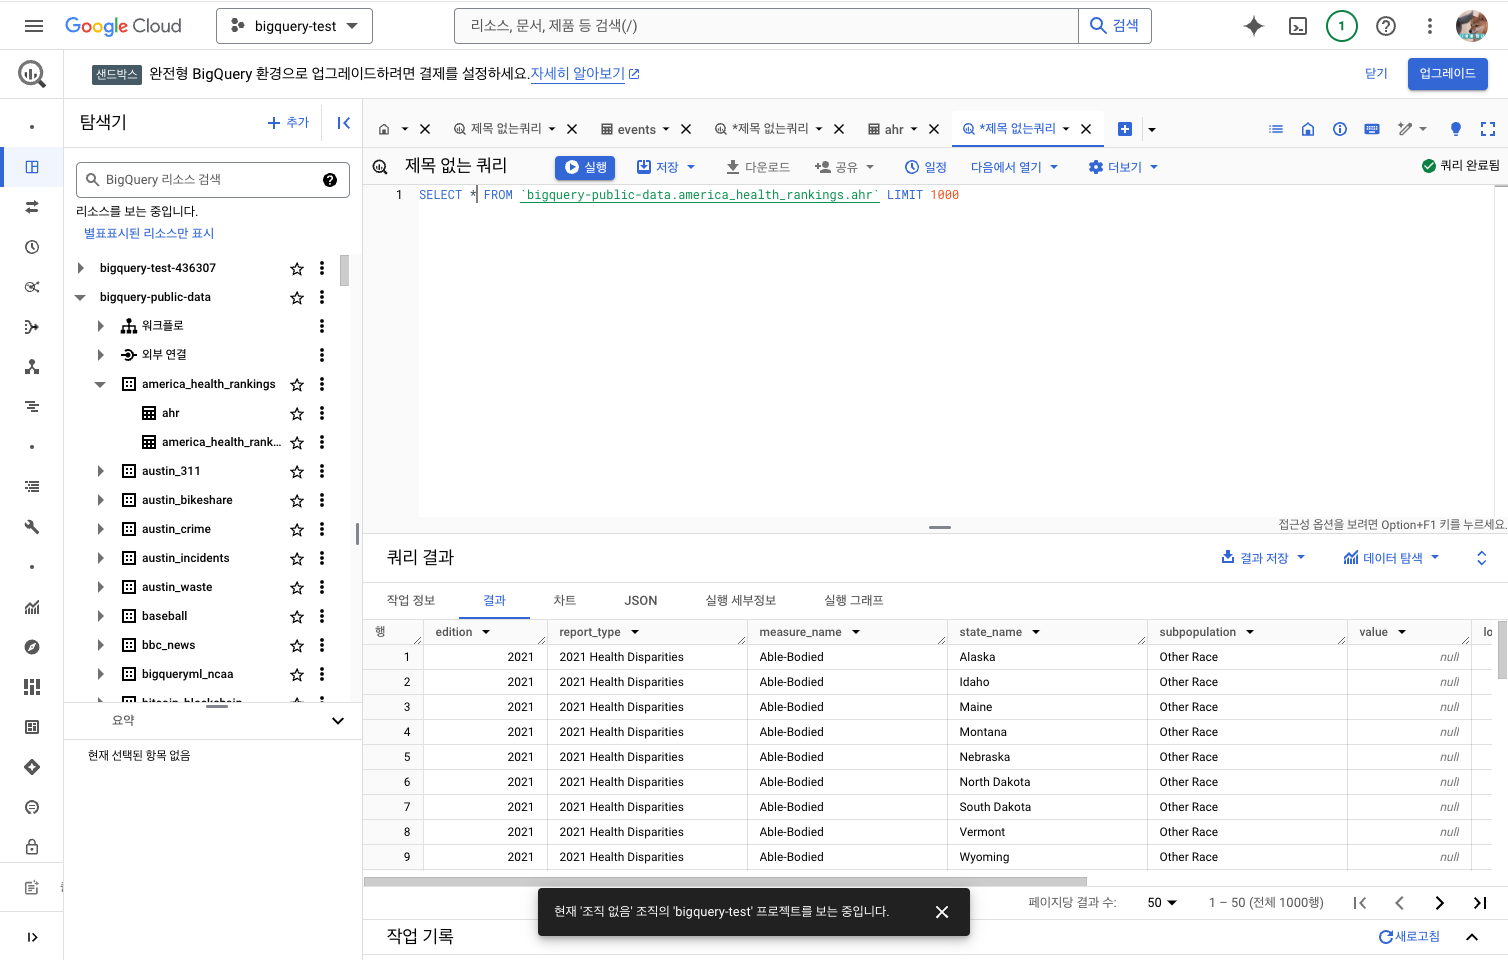

쿼리 작성 및 조회에 따라 과금되기 때문에 필요한 컬럼을 미리 다 작성해두는 편이 좋다.

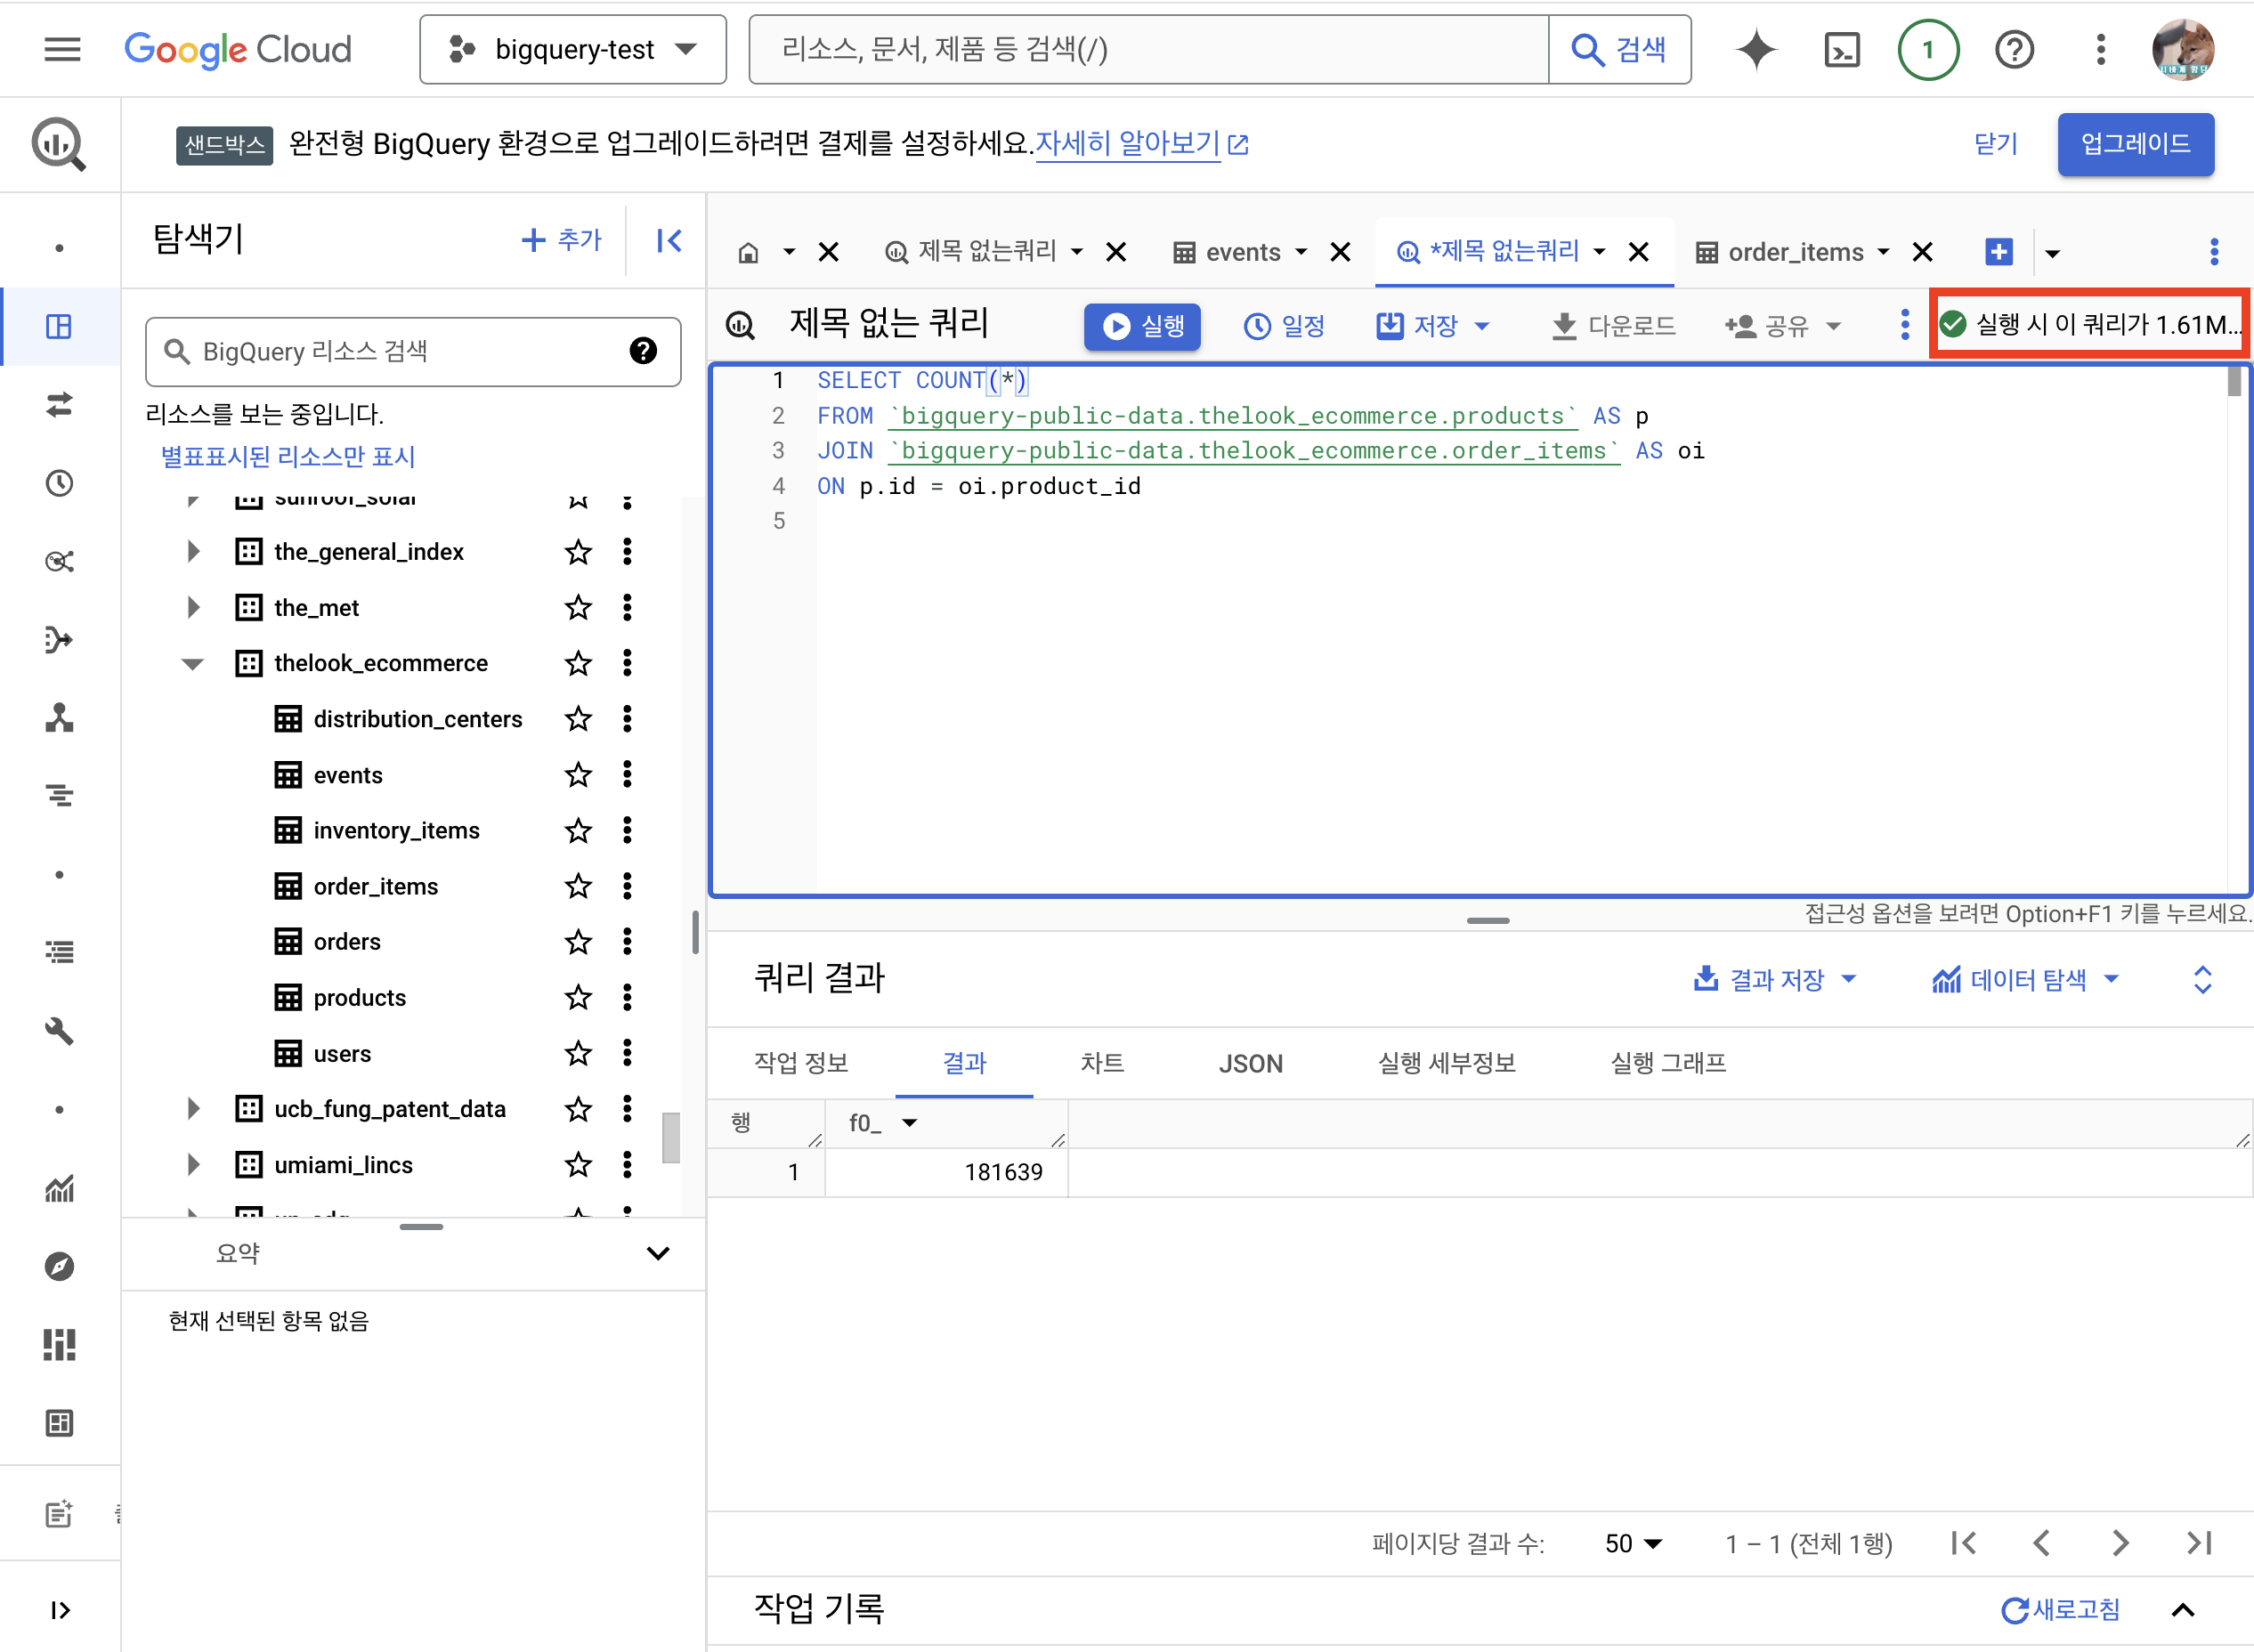

총 181639 개 데이터

product 별로 구매 수량 조회 (상품 이름, 카테고리, 총 주문 수량)

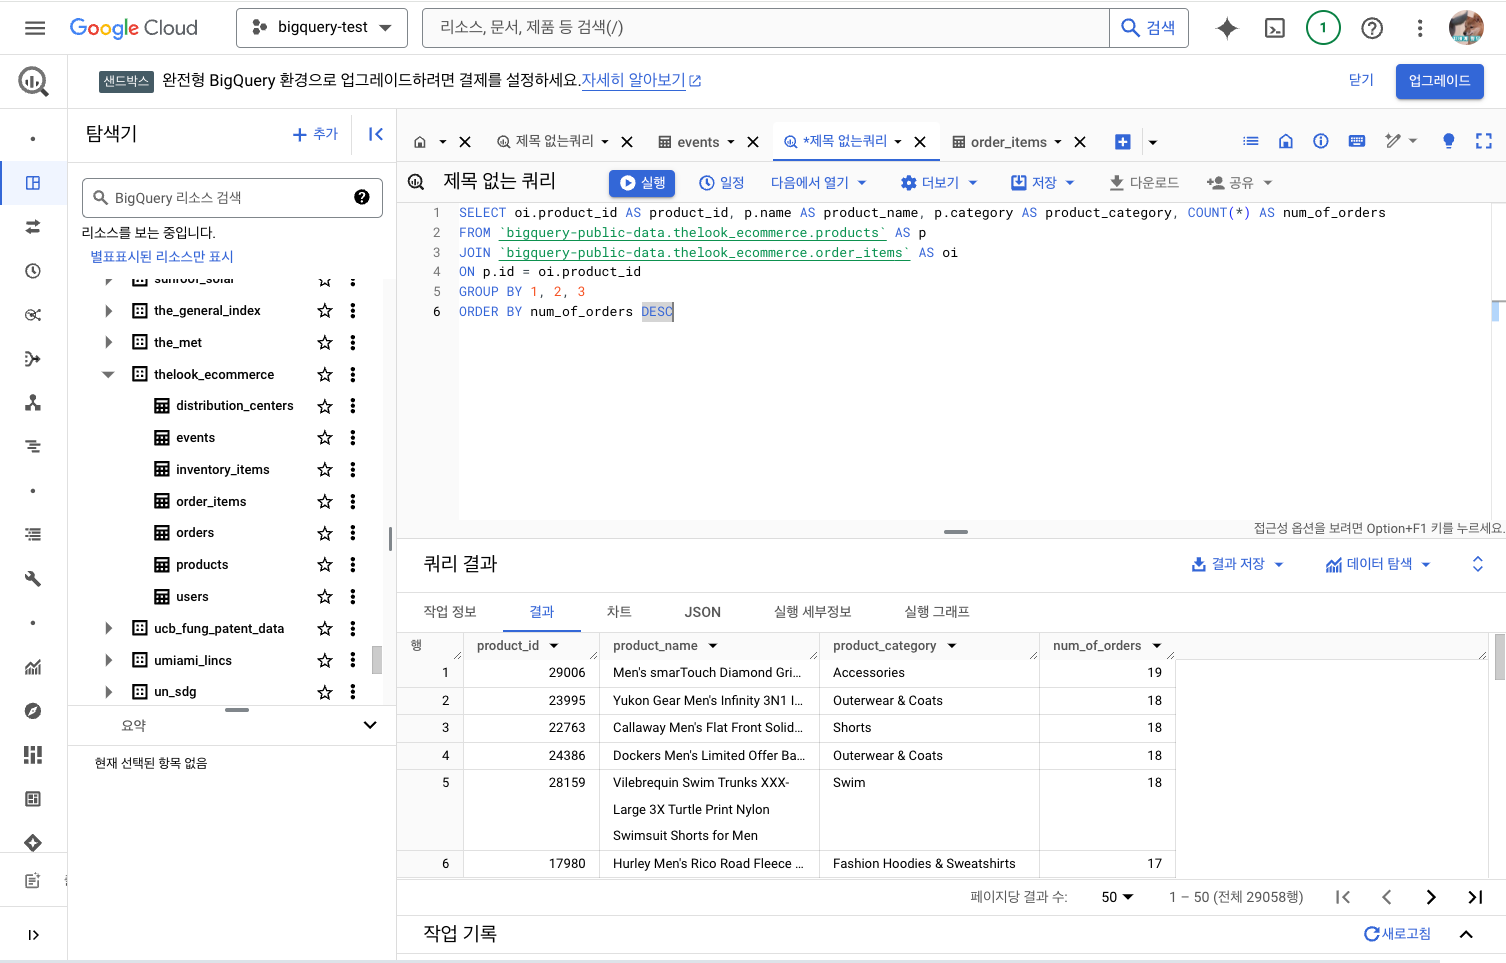

# 사용할 데이터 확인 : TheLook Ecommerce

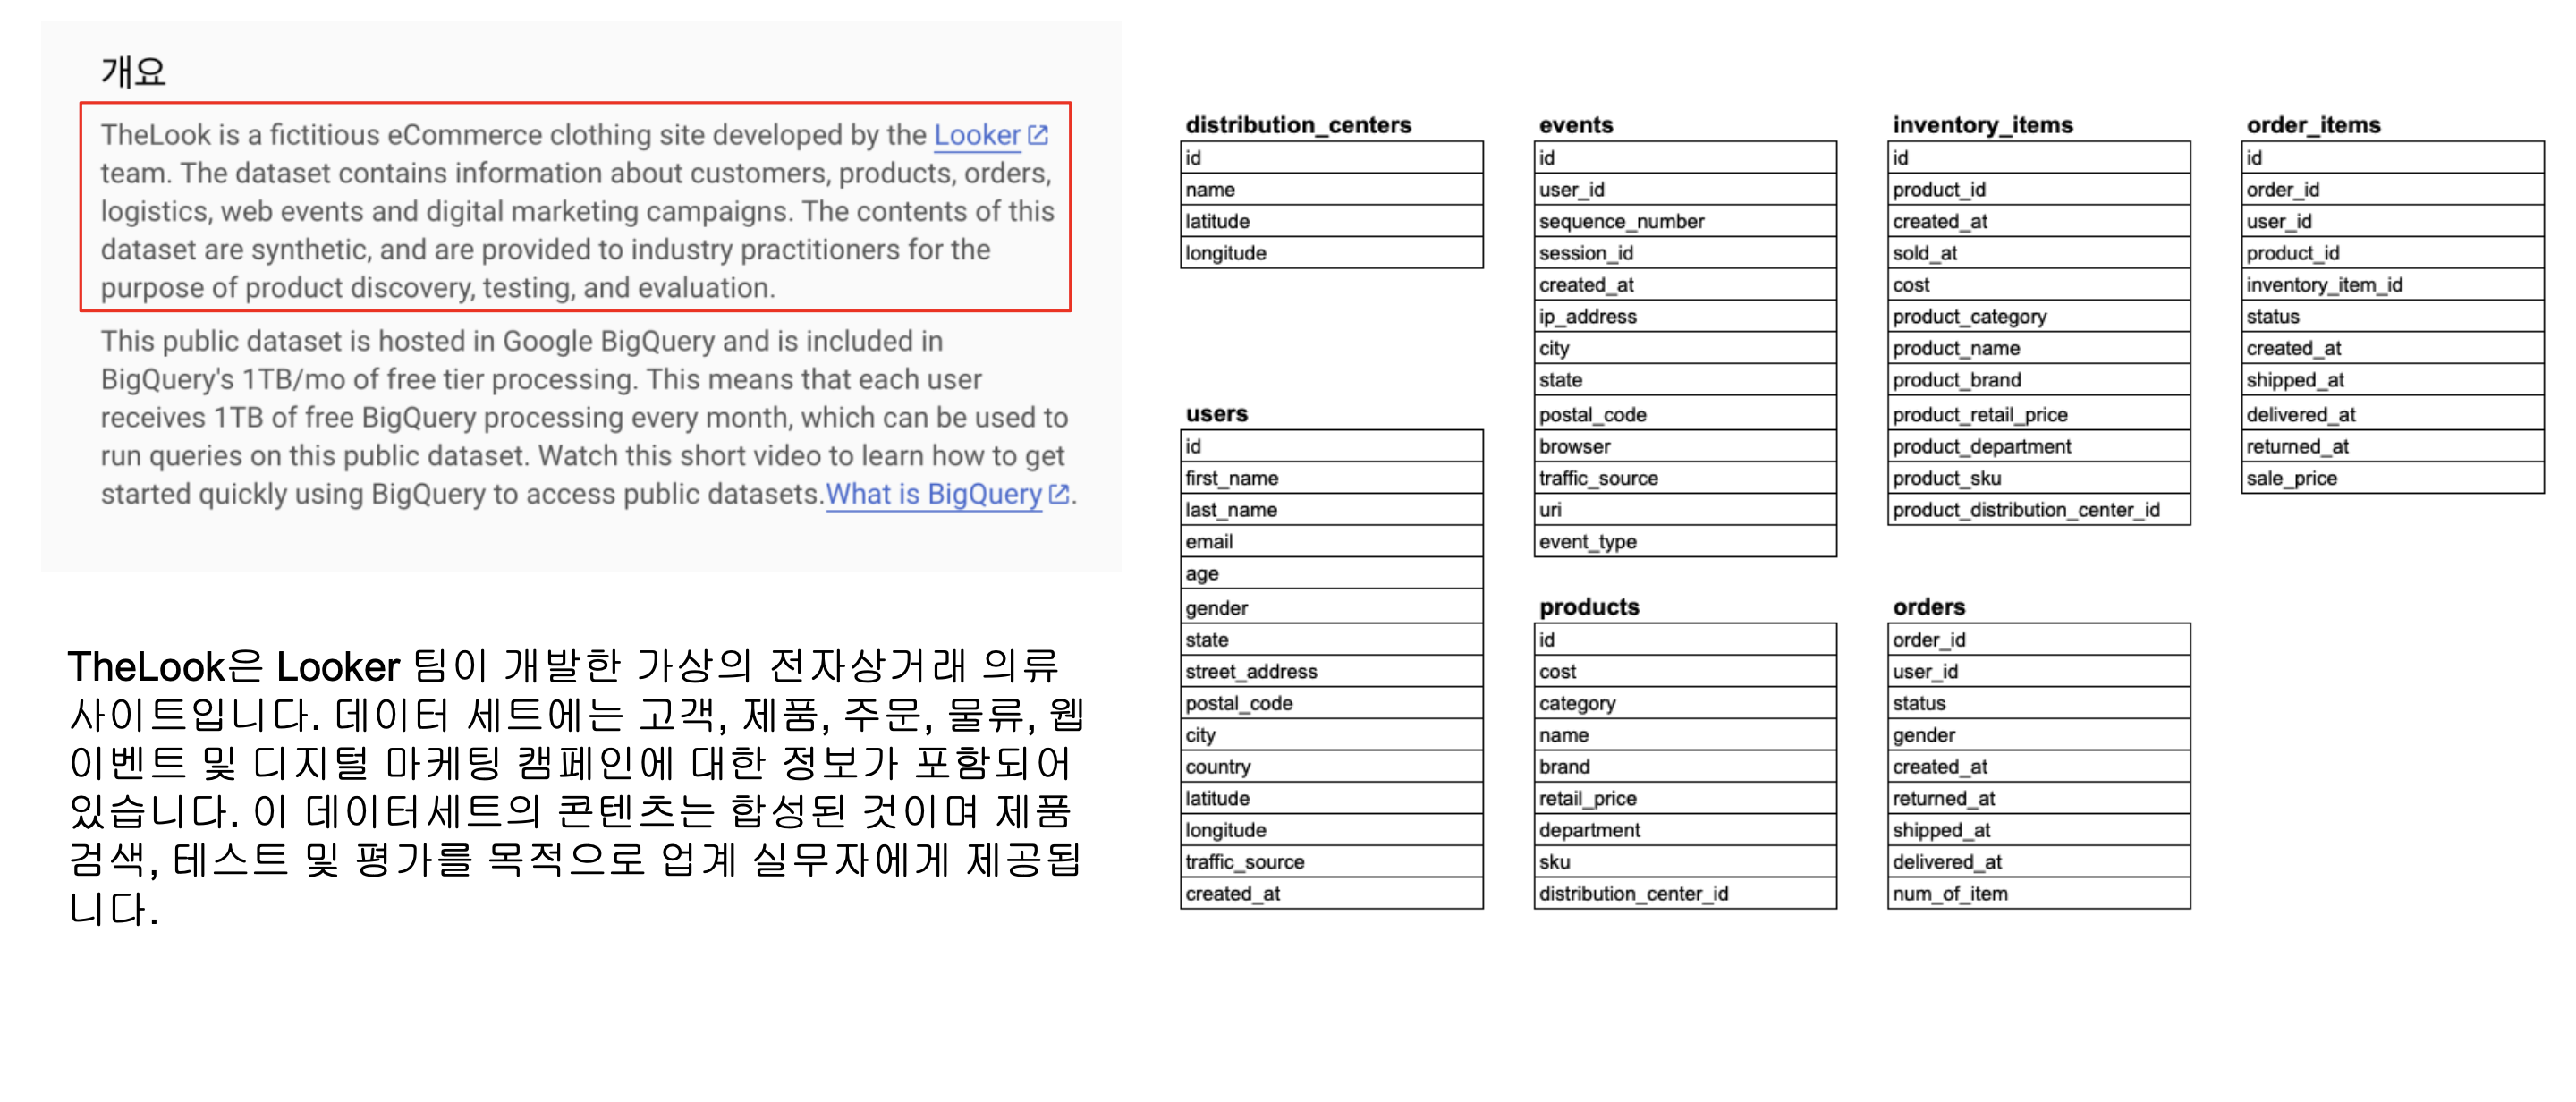

-----------------------------------------------

# 간단한 빅쿼리 실습 1

In [ ]:
# # Q1. 2023년 가입 유저수
# SELECT COUNT(id)
# FROM `bigquery-public-data.thelook_ecommerce.users`
# WHERE created_at BETWEEN '2023-01-01' AND '2024-01-01'

In [ ]:
# # Q2. 브라우저별 세션 수
# SELECT browser, COUNT(session_id) AS total_session
# FROM `bigquery-public-data.thelook_ecommerce.events`
# WHERE created_at BETWEEN '2023-01-01' AND '2024-01-01'
# GROUP BY browser
# ORDER BY total_session DESC

In [ ]:
# # Q3. 2023년 월별 매출액(sale_price*num_of_item), 주문수, 주문 유저수 계산
# SELECT
#   FORMAT_DATE('%m', oi.created_at) AS month,
#   SUM(oi.sale_price * o.num_of_item) AS revenue,
#   COUNT(DISTINCT o.order_id) AS order_count,        -- 한 사람이 여러 제품을 주문할 수도 있다.
#   COUNT(DISTINCT o.user_id) AS customers_purchased
# FROM `bigquery-public-data.thelook_ecommerce.order_items` as oi
# LEFT OUTER JOIN `bigquery-public-data.thelook_ecommerce.orders` as o
# ON o.order_id = oi.order_id
# WHERE (oi.created_at BETWEEN '2023-01-01' AND '2024-01-01') AND (oi.status NOT IN('cancelled', 'Returned'))
# GROUP BY FORMAT_DATE('%m', oi.created_at)
# ORDER BY month

In [ ]:
# # Q4. order_items에서 status가 Cancelled, Returned된 상품들의 남녀로 나누어서 매출액(sale_price*num_of_item), 수량 계산하기
# SELECT o.gender AS gender, SUM(oi.sale_price * o.num_of_item) AS revenue, SUM(o.num_of_item) AS quantity
# FROM `bigquery-public-data.thelook_ecommerce.order_items` as oi
# LEFT OUTER JOIN `bigquery-public-data.thelook_ecommerce.orders` as o
# ON oi.order_id = o.order_id
# WHERE (oi.status IN('Cancelled', 'Returned')) AND (oi.created_at BETWEEN '2023-01-01' AND '2024-01-01')
# GROUP BY o.gender
# ORDER BY revenue

In [ ]:
# Q5. TRAFFIC SOURCE 별 전체 sessions, 구매 sessions, 구매 sessions/전체 sessions(세션별 구매율)

# Python과 Bigquery 연동하기

참고 블로그 : https://velog.io/@suminwooo/%EB%B9%85%EC%BF%BC%EB%A6%AC-%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%97%B0%EB%8F%991

## bigquery 사용을 위한 라이브러리 설치
## 0. 빅쿼리 연동 및 확인 코드

In [1]:
# pip install --upgrade google-cloud-bigquery

In [3]:
from google.oauth2 import service_account
from google.cloud import bigquery

SERVICE_ACCOUNT_FILE = "./api_key.json"  # 키 json 파일
credentials = service_account.Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE)
project_id = ""       # 개별 프로젝트 아이디
client = bigquery.Client(credentials=credentials, project=project_id)

def import_bigquery_data(query):
    query_job = client.query(query)
    return query_job.to_dataframe()

data = import_bigquery_data('''
    SELECT *
    FROM `bigquery-public-data.google_trends.international_top_rising_terms`
    WHERE refresh_date = '2024-08-01'
    LIMIT 10
    ;
''')

data.head()

,country_code,region_name,region_code,term,week,refresh_date,country_name,rank,percent_gain,score
0,RO,Alba County,RO-AB,isj iasi,2019-07-28,2024-08-01,Romania,25,100,<NA>
1,RO,Alba County,RO-AB,isj iasi,2019-08-04,2024-08-01,Romania,25,100,<NA>
2,RO,Alba County,RO-AB,isj iasi,2019-08-11,2024-08-01,Romania,25,100,<NA>
3,RO,Alba County,RO-AB,isj iasi,2019-08-18,2024-08-01,Romania,25,100,<NA>
4,RO,Alba County,RO-AB,isj iasi,2019-08-25,2024-08-01,Romania,25,100,<NA>


테스트 데이터 : 구글에서 제공하는 무료 데이터셋   
테스트 데이터 프레임이 잘 나오면 연동 완료된 것

## 1. 이전에 활용한 쿼리 결과를 파이썬으로 추출
### 1-0. 필요한 데이터 미리 추출하기
- 프로젝트 명 : bigquery-public-data
- 데이터 셋 : thelook_ecommerce
- 사용 테이블 : products, order_items, orders, users, events

In [84]:
import pandas as pd
import time
import datetime

In [102]:
# 모든 데이터 가져오기. 보통은 sql로 정제작업을 한 뒤 가져오는게 훨씬 효율적이다.
st = time.time()
products = import_bigquery_data('''
    SELECT *
    FROM `bigquery-public-data.thelook_ecommerce.products`
''')
et1 = time.time()
print("걸린시간1 : ", et1 - st)

order_items = import_bigquery_data('''
    SELECT *
    FROM `bigquery-public-data.thelook_ecommerce.order_items`
    WHERE created_at BETWEEN '2024-06-01' AND '2025-01-01'
''')
et2 = time.time()
print("걸린시간2 : ", et2 - et1)

orders = import_bigquery_data('''
    SELECT *
    FROM `bigquery-public-data.thelook_ecommerce.orders`
    WHERE created_at BETWEEN '2024-06-01' AND '2025-01-01'
''')
et3 = time.time()
print("걸린시간3 : ", et3 - et2)

users = import_bigquery_data('''
    SELECT *
    FROM `bigquery-public-data.thelook_ecommerce.users`
''')
et4 = time.time()
print("걸린시간4 : ", et4 - et3)

events = import_bigquery_data('''
    SELECT *
    FROM `bigquery-public-data.thelook_ecommerce.events`
    WHERE created_at BETWEEN '2024-06-01' AND '2025-01-01'
''')
et5 = time.time()
print("걸린시간5 : ", et5 - et4)
print("총 소요 시간 : ", et5 - st)

걸린시간1 :  1.799551248550415
걸린시간2 :  1.5973193645477295
걸린시간3 :  1.6333835124969482
걸린시간4 :  1.7380783557891846
걸린시간5 :  2.1680643558502197
총 소요 시간 :  8.936396837234497


In [103]:
# created_at 컬럼의 데이터 타입 datetime → string으로 변경 (년-월-일 나오도록)
users['created_at'] = [str(i)[:10] for i in users['created_at']]
users

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
0,4695,Megan,Smith,megansmith@example.org,62,F,Acre,117 Potter Lakes,69980-000,null,Brasil,-8.065346,-72.870949,Search,2021-01-27
1,13500,Michael,Hamilton,michaelhamilton@example.net,46,M,Acre,564 Holland Shore,69980-000,null,Brasil,-8.065346,-72.870949,Search,2021-04-27
2,19024,Daniel,Jones,danieljones@example.org,49,M,Acre,097 Veronica Divide Apt. 375,69980-000,null,Brasil,-8.065346,-72.870949,Search,2024-06-08
3,22557,Mark,Griffith,markgriffith@example.com,38,M,Acre,328 Crystal Key Apt. 333,69980-000,null,Brasil,-8.065346,-72.870949,Search,2024-03-05
4,28260,Barry,Padilla,barrypadilla@example.com,52,M,Acre,50416 Jones Shores,69980-000,null,Brasil,-8.065346,-72.870949,Display,2021-11-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1708,Jason,Cruz,jasoncruz@example.net,32,M,Île-de-France,9582 Bell Island,77260,Chamigny,France,48.969392,3.124882,Search,2022-08-21
99996,42406,John,Long,johnlong@example.org,37,M,Île-de-France,4258 Williams Row,77260,Chamigny,France,48.969392,3.124882,Search,2023-10-25
99997,52256,Michele,Ryan,micheleryan@example.com,53,F,Île-de-France,73603 Smith Station Suite 210,77260,Chamigny,France,48.969392,3.124882,Search,2019-10-20
99998,2002,Joseph,Sampson,josephsampson@example.com,32,M,Île-de-France,32015 Hill Garden Suite 073,77160,Chenoise-Cucharmoy,France,48.589783,3.243343,Search,2022-10-07


In [104]:
events['created_at'] = [str(i)[:10] for i in events['created_at']]
events

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
0,1694724,<NA>,3,d53ff294-b1dc-42d3-981f-f7cbe58be0b5,2024-08-06,97.110.112.74,São Paulo,São Paulo,02675-031,Chrome,YouTube,/cancel,cancel
1,1802879,<NA>,3,b024c62d-cd3f-48ad-a46a-a96ac6949263,2024-06-12,153.78.112.205,São Paulo,São Paulo,02675-031,Chrome,Email,/cancel,cancel
2,2045950,<NA>,3,766f9a1d-e752-420b-a284-00076d9f717f,2024-09-18,3.23.70.97,São Paulo,São Paulo,08285-060,Chrome,Facebook,/cancel,cancel
3,1480325,<NA>,3,1d556784-283c-4399-926b-2db4057a54ae,2024-09-03,38.207.50.49,Beijing,Beijing,100028,Chrome,Email,/cancel,cancel
4,1698326,<NA>,3,76a48b3d-0fb1-469b-b596-22721224fcf8,2024-06-28,64.225.45.187,Qujing,Beijing,100032,Chrome,Adwords,/cancel,cancel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
366371,1069353,82402,13,07d02187-cdda-4ae0-9eca-a206038b75c0,2024-09-24,7.66.237.205,Widnes,England,WA8,Safari,Facebook,/purchase,purchase
366372,1019354,78598,5,67e593fb-4640-40a0-ae72-7d14fddf32c5,2024-07-22,124.80.32.128,Widnes,England,WA8,IE,Adwords,/purchase,purchase
366373,126760,9704,5,2666510a-a437-428b-99c6-db0e1e6222bb,2024-09-06,50.110.43.206,Batley,England,WF17,Firefox,Adwords,/purchase,purchase
366374,709364,55037,7,6eb0b793-1203-4a56-9add-84a3914d5421,2024-08-15,184.183.128.13,Crofton,England,WF4,Chrome,Email,/purchase,purchase


## 1-1. SQL 쿼리문을 Python (Pandas)를 활용하여 변환

### 예시쿼리 1

In [105]:
# 예시쿼리 1
data1 = import_bigquery_data('''
    SELECT oi.product_id as product_id, p.name as product_name, p.category as product_category, count(*) as num_of_orders
    FROM `bigquery-public-data.thelook_ecommerce.products` as p
    JOIN `bigquery-public-data.thelook_ecommerce.order_items` as oi
    ON p.id = oi.product_id
    GROUP BY 1,2,3
    ORDER BY num_of_orders DESC
''')

data1.head()

,product_id,product_name,product_category,num_of_orders
0,20041,Calvin Klein Mens 2 Button Solid Black Wool Suit,Suits & Sport Coats,19
1,23576,Royal Robbins Men's Billy Goat Utility Shorts,Shorts,19
2,16264,HANES Men's 4.5 oz NANO-T Long Sleeve T-Shirt ...,Tops & Tees,18
3,23584,Ben Sherman Men's Lightly Washed Oxford Shorts,Shorts,18
4,27839,AFTCO Wahoo Boardshorts,Swim,18


### 예시쿼리 2

In [106]:
data2 = import_bigquery_data('''
    SELECT u.id as user_id, u.first_name, u.last_name, avg(oi.sale_price) as avg_sale_price
    FROM `bigquery-public-data.thelook_ecommerce.users` as u
    JOIN `bigquery-public-data.thelook_ecommerce.order_items` as oi
    ON u.id = oi.user_id
    GROUP BY 1,2,3
    ORDER BY avg_sale_price DESC
    LIMIT 10
''')
data2.head()

,user_id,first_name,last_name,avg_sale_price
0,63055,Kenneth,Butler,999.0
1,93282,Robert,Clayton,990.0
2,67547,Timothy,Turner,903.0
3,48477,Jacob,Stafford,903.0
4,8875,Gary,Ramirez,903.0


### Q1. 2023년 가입 유저 수 → 2024년 6월 한달간 가입한 유저수



In [107]:
data3 = import_bigquery_data('''
    SELECT COUNT(id) AS total_user
    FROM `bigquery-public-data.thelook_ecommerce.users`
    WHERE created_at BETWEEN "2024-06-01" AND "2025-01-01"
    ;
''')

data3.head()

,total_user
0,7863


In [108]:
# pandas로 확인
len(users[(users['created_at'] >= '2024-06-01') & (users['created_at'] < '2025-01-01')])

7863

### Q2. 브라우저별 세션 수

In [109]:
data4 = import_bigquery_data('''
    SELECT
     browser,
     COUNT(session_id) AS total_session
    FROM `bigquery-public-data.thelook_ecommerce.events`
    WHERE sequence_number = 1 AND created_at BETWEEN "2024-06-01" AND "2025-01-01"
    GROUP BY browser
    ORDER BY total_session DESC
    ;
''')

data4.head()

,browser,total_session
0,Chrome,35100
1,Firefox,13929
2,Safari,13906
3,IE,3491
4,Other,3470


In [110]:
# 'session_id' 컬럼만 대상으로 카운트 수행
events[events['sequence_number']==1].groupby('browser')[['session_id']].count().sort_values(by='session_id', ascending=False)

,session_id
browser,
Chrome,35100
Firefox,13929
Safari,13906
IE,3491
Other,3470


In [111]:
# 내 코드 : 모든 열을 카운트 한 후 'session_id'만 선태
events[(events['created_at'] >= '2024-06-01') & (events['created_at'] < '2025-01-01') & (events['sequence_number'] == 1)].groupby('browser').count()['session_id'].sort_values(ascending=False)

,session_id
browser,
Chrome,35100
Firefox,13929
Safari,13906
IE,3491
Other,3470


In [112]:
# 코드 수정 : 'session_id' 열만 카운트 하기
events[(events['created_at'] >= '2024-06-01') & (events['created_at'] < '2025-01-01') & (events['sequence_number'] == 1)].groupby('browser')['session_id'].count().sort_values(ascending=False)

,session_id
browser,
Chrome,35100
Firefox,13929
Safari,13906
IE,3491
Other,3470


### Q3. 2023년 월별 매출액 (sale_price * num_of_item), 주문수, 주문 유저 수 계산

In [113]:
data5 = import_bigquery_data('''
    SELECT
     EXTRACT(MONTH FROM A.created_at) AS month,
     SUM(A.sale_price*B.num_of_item) AS revenue,
     COUNT(DISTINCT A.order_id) AS order_count,
     COUNT(DISTINCT A.user_id) AS customers_purchased
    FROM `bigquery-public-data.thelook_ecommerce.order_items` AS A
    LEFT OUTER JOIN `bigquery-public-data.thelook_ecommerce.orders` AS B ON A.order_id = B.order_id
    WHERE A.status NOT IN ('Cancelled','Returned') AND A.created_at BETWEEN "2024-06-01" AND "2025-01-01"
    GROUP BY EXTRACT(MONTH FROM A.created_at)
    ORDER BY month
    ;
''')

data5.head()

,month,revenue,order_count,customers_purchased
0,6,6.481372e+05,4082,3948
1,7,7.788924e+05,4772,4557
2,8,8.756641e+05,5491,5151
3,9,1.300472e+06,8003,6657


In [114]:
order_items.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,69419,47928,38397,28700,187410,Complete,2024-06-10 02:21:53+00:00,2024-06-11 13:10:00+00:00,2024-06-12 02:13:00+00:00,NaT,1.50
1,135438,93489,74923,28700,365432,Processing,2024-06-06 02:08:48+00:00,NaT,NaT,NaT,1.50
2,23155,16050,12691,13629,62458,Processing,2024-06-09 03:35:40+00:00,NaT,NaT,NaT,1.51
3,146920,101371,81163,13629,396352,Shipped,2024-07-19 08:31:39+00:00,2024-07-19 02:09:00+00:00,NaT,NaT,1.51
4,122437,84641,67845,14298,330319,Cancelled,2024-09-23 03:36:56+00:00,NaT,NaT,NaT,1.72


In [117]:
orders.head()

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,64,56,Cancelled,F,2024-06-15 03:01:00+00:00,NaT,NaT,NaT,3
1,65,56,Cancelled,F,2024-06-03 03:01:00+00:00,NaT,NaT,NaT,1
2,115,91,Cancelled,F,2024-09-23 01:14:42.250930+00:00,NaT,NaT,NaT,1
3,140,118,Cancelled,F,2024-07-11 03:07:00+00:00,NaT,NaT,NaT,1
4,173,146,Cancelled,F,2024-08-24 03:08:00+00:00,NaT,NaT,NaT,1


In [126]:
# From / Join -> where -> groupby -> select -> order by : Query Execusion Order에 맞춰 변환
merged = pd.merge(orders, order_items[['order_id', 'sale_price']], on='order_id')
where_merged = merged[(~merged['status'].isin(['Cancelled', 'Returned'])) & (merged['created_at'] >= '2024-06-01') & (merged['created_at'] < '2025-01-01')]

# month 열 생성
where_merged = where_merged[['order_id', 'created_at', 'user_id', 'sale_price', 'num_of_item']]
where_merged['month'] = [str(i)[5:7] for i in where_merged['created_at']]
# where_merged.groupby('month').agg(

# )


### Q4. order_items에서 status가 Cancelled, Returned된 상품들의 남녀로 나누어서 매출액 (sale_price * num_of_item), 수량 계산하기

In [100]:
data6 = import_bigquery_data('''
    SELECT
     B.gender,
     SUM(A.sale_price*B.num_of_item) AS revenue,
     SUM(B.num_of_item) quantity
    FROM `bigquery-public-data.thelook_ecommerce.order_items` A
    LEFT JOIN `bigquery-public-data.thelook_ecommerce.orders` B ON A.order_id = B.order_id
    WHERE A.status NOT IN ('Cancelled','Returned')
    GROUP BY B.gender
    ORDER BY revenue
    ;
''')

data6.head()

,gender,revenue,quantity
0,F,7.239473e+06,129585
1,M,8.187021e+06,128514


### Q5. TRAFFIC SOURCE 별 전체 sessions, 구매 sessions, 구매 sessions/전체 sessions(세션별 구매율)

In [101]:
data7 = import_bigquery_data('''
    WITH a AS (
     SELECT
       traffic_source,
       COUNT(session_id) AS total_session
     FROM `bigquery-public-data.thelook_ecommerce.events`
     WHERE sequence_number = 1 AND created_at BETWEEN "2024-06-01" AND "2025-01-01"
     GROUP BY traffic_source
    ),b AS (
     SELECT
       traffic_source,
       COUNT(session_id) As purchase_session
     FROM `bigquery-public-data.thelook_ecommerce.events`
     WHERE event_type= 'purchase' AND session_id IN
       (SELECT session_id
       FROM `bigquery-public-data.thelook_ecommerce.events`
       GROUP BY session_id
       HAVING MIN(created_at) BETWEEN "2024-06-01" AND "2025-01-01")
     GROUP BY traffic_source
    )

    SELECT
     a.traffic_source,
     a.total_session,
     b.purchase_session,
     ROUND(SAFE_DIVIDE(b.purchase_session, a.total_session), 4) AS conversion_rate
    FROM a JOIN b ON a.traffic_source = b.traffic_source
    ORDER BY purchase_session DESC
    ;
''')

data7.head()

,traffic_source,total_session,purchase_session,conversion_rate
0,Email,31486,19064,0.6055
1,Adwords,20888,12639,0.6051
2,YouTube,7015,4258,0.6070
3,Facebook,6901,4195,0.6079
4,Organic,3606,2230,0.6184
